In [ ]:
!nvidia-smi -L

GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-db278920-a849-faea-aa08-96dc57068be6)


In [ ]:
!nvidia-smi

Sat Aug 27 16:47:39 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# First attach your google drive to the colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os
# The path below should point to the directory containing this notebook and the associated utility files
# Change it if necessary
os.chdir('/content/drive/MyDrive/TF2 Project')
!ls


'Best preds test 1'
'Best preds test 2'
'Best preds with post test 1'
'Best preds with post test 2'
 logs
'Mask-RCNN baseline modification.ipynb'
 mask_rcnn_coco.h5
 mask_rcnn_nucleus.h5
 mrcnn
'Preds test 1'
'Preds test 2'
 requirements.txt
'TF2 Mask-RCNN for nuclei segmentation.ipynb'


In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 26.5 MB 1.2 MB/s 
     |████████████████████████████████| 516.2 MB 3.9 kB/s 
     |████████████████████████████████| 377 kB 70.5 MB/s 
     |████████████████████████████████| 2.9 MB 71.1 MB/s 
     |████████████████████████████████| 26.1 MB 1.1 MB/s 
     |████████████████████████████████| 454 kB 77.6 MB/s 
     |████████████████████████████████| 3.0 MB 56.0 MB/s 
     |████████████████████████████████| 50 kB 6.3 MB/s 
     |████████████████████████████████| 1.6 MB 77.7 MB/s 
     |████████████████████████████████| 120 kB 80.2 MB/s 
     |████████████████████████████████| 298 kB 95.3 MB/s 
     |████████████████████████████████| 154 kB 80.1 MB/s 
     |████████████████████████████████| 82 kB 606 kB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
  

In [ ]:
!pip install 'scipy==1.2.2' --force-reinstall

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.8 MB 4.1 MB/s 
     |████████████████████████████████| 15.7 MB 63.5 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.2.0 requires scipy==1.4.1; python_version >= "3", but you have scipy 1.2.2 which is incompatible.
pymc 4.1.4 requires scipy>=1.4.1, but you have scipy 1.2.2 which is incompatible.
plotnine 0.8.0 requires scipy>=1.5.0, but you have scipy 1.2.2 which is incompatible.
jaxlib 0.3.15+cuda11.cudnn805 r

In [ ]:
import h5py
h5py.__version__

'2.10.0'

In [ ]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
import json
import pandas as pd
import imgaug
from imgaug import augmenters as iaa

from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize

In [ ]:
imgaug.__version__

'0.4.0'

In [ ]:
import tensorflow
import skimage
print(tensorflow.__version__,  skimage.__version__)

2.2.0 0.16.2


In [ ]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [ ]:
import scipy
scipy.__version__

'1.2.2'

In [ ]:
#This cell needs execution ONLY ONCE!

#!mkdir stage1_train stage1_test

In [ ]:
# This cell needs execution ONLY ONCE!

#!unzip kaggle-dsbowl-2018-dataset-fixes-master -d stage1_train/

Output streaming troncato alle ultime 5000 righe.
  inflating: stage1_train_fixed/kaggle-dsbowl-2018-dataset-fixes-master/stage1_train/d52958107d0b1f0288f50f346a833df3df485b92d5516cfcb536e73ab7adafd0/masks/2bdcda0cab5d82088d3a8a5f1ad21681e1e1cf0a36535e7cfc86fa487b8367fa.png  
  inflating: stage1_train_fixed/kaggle-dsbowl-2018-dataset-fixes-master/stage1_train/d52958107d0b1f0288f50f346a833df3df485b92d5516cfcb536e73ab7adafd0/masks/2c27af2b1bbdf749de66a5093b030989e5e10ad941d9d03121266a3b46a3a22c.png  
  inflating: stage1_train_fixed/kaggle-dsbowl-2018-dataset-fixes-master/stage1_train/d52958107d0b1f0288f50f346a833df3df485b92d5516cfcb536e73ab7adafd0/masks/2fbbb85807ba12253def8d9386ace81f1244b37bf26455805351f5208bb9e056.png  
  inflating: stage1_train_fixed/kaggle-dsbowl-2018-dataset-fixes-master/stage1_train/d52958107d0b1f0288f50f346a833df3df485b92d5516cfcb536e73ab7adafd0/masks/30060dcef226eb587f6f760c474ff97bcb329f6180ed4184c077b9eaa1fe614e.png  
  inflating: stage1_train_fixed/kaggle-dsb

In [ ]:
#This cell needs execution ONLY ONCE!

#!mkdir external

In [ ]:
#This cell needs execution ONLY ONCE!

#!unzip MoNuSeg2018TrainingData.zip -d external/

Archive:  MoNuSeg2018TrainingData.zip
   creating: external/MoNuSeg 2018 Training Data/
  inflating: external/MoNuSeg 2018 Training Data/.DS_Store  
   creating: external/__MACOSX/
   creating: external/__MACOSX/MoNuSeg 2018 Training Data/
  inflating: external/__MACOSX/MoNuSeg 2018 Training Data/._.DS_Store  
   creating: external/MoNuSeg 2018 Training Data/Annotations/
  inflating: external/MoNuSeg 2018 Training Data/Annotations/TCGA-38-6178-01Z-00-DX1.xml  
   creating: external/__MACOSX/MoNuSeg 2018 Training Data/Annotations/
  inflating: external/__MACOSX/MoNuSeg 2018 Training Data/Annotations/._TCGA-38-6178-01Z-00-DX1.xml  
  inflating: external/MoNuSeg 2018 Training Data/Annotations/TCGA-HE-7129-01Z-00-DX1.xml  
  inflating: external/__MACOSX/MoNuSeg 2018 Training Data/Annotations/._TCGA-HE-7129-01Z-00-DX1.xml  
  inflating: external/MoNuSeg 2018 Training Data/Annotations/TCGA-A7-A13E-01Z-00-DX1.xml  
  inflating: external/__MACOSX/MoNuSeg 2018 Training Data/Annotations/._TCGA-A

In [ ]:
# # Data Path
TRAIN_PATH = '../stage1_train/'
TEST_PATH = '../stage1_test/'
#TEST_PATH = '../stage2_test/'

# # Get train and test IDs
train_ids = next(os.walk(TRAIN_PATH))[1]
test_ids = next(os.walk(TEST_PATH))[1]


In [ ]:
#!pip freeze >> env_requirements.txt

In [ ]:
from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log
from mrcnn import augment_preprocess

%matplotlib inline 

# Root directory of the project
ROOT_DIR = os.getcwd()
print(ROOT_DIR)

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

/content/drive/MyDrive/TF2 Project


In [ ]:
#This cell needs execution ONLY ONCE!

#augment_preprocess.data_to_array(TRAIN_PATH)

560
580
600
620
640
660


In [ ]:
#This cell needs execution ONLY ONCE!

#annot_path = '../external/annotations/'
#tissue_path = '../external/tissue_images/'

#augment_preprocess.preprocess_external_data(annot_path, tissue_path, TRAIN_PATH)

37it [05:09,  8.37s/it]


In [ ]:
#This cell needs execution ONLY ONCE!

#import tqdm

#augment_preprocess.make_n_save_mosaic(TRAIN_PATH)

100%|██████████| 76/76 [09:15<00:00,  7.31s/it]


In [ ]:
from sklearn.model_selection import train_test_split
def train_validation_split(train_path, seed=10, test_size=0.1):

    """
    Split the dataset into train and validation sets.
    External data and mosaics are directly appended to training set.
    """


    image_ids = list(filter(lambda x: ('mosaic' not in x) and ('TCGA' not in x), os.listdir(train_path)))
    mosaic_ids = list(filter(lambda x: 'mosaic' in x, os.listdir(train_path)))
    external_ids = list(filter(lambda x: 'TCGA' in x, os.listdir(train_path)))

    # Load and preprocess the dataset with train image modalities
    df = pd.read_csv('../classes.csv')
    df['labels'] = df['foreground'].astype(str) + df['background']
    df['filename'] = df['filename'].apply(lambda x: x[:-4])
    df = df.set_index('filename')
    df = df.loc[image_ids]

    print(df['labels'].size)
    # Split training set based on provided image modalities
    # This ensures that model validates on all image modalities.
    train_list, val_list = train_test_split(df.index, test_size=test_size,
                                            random_state=seed, stratify=df['labels'])

    # Add external data and mos ids to training list
    train_list = list(train_list) + mosaic_ids + external_ids
    val_list = list(val_list)

    return train_list, val_list


In [ ]:
train_list, val_list = train_validation_split(TRAIN_PATH, seed=11, test_size=0.1)

664


In [ ]:
class NucleusConfig(Config):
    """Configuration for training on the nucleus segmentation dataset."""
    # Give the configuration a recognizable name
    NAME = "nucleus"

    # Adjust depending on your GPU memory
    IMAGES_PER_GPU = 2

    # Number of classes (including background)
    NUM_CLASSES = 1 + 1  # Background + nucleus

    # Number of training and validation steps per epoch
    STEPS_PER_EPOCH = math.ceil(len(train_list) // IMAGES_PER_GPU)
    VALIDATION_STEPS = math.ceil(len(val_list) // IMAGES_PER_GPU)

    # Don't exclude based on confidence. Since we have two classes
    # then 0.5 is the minimum anyway as it picks between nucleus and BG
    DETECTION_MIN_CONFIDENCE = 0.7

    # Backbone network architecture
    # Supported values are: resnet50, resnet101
    BACKBONE = "resnet101"

    # Input image resizing
    # Random crops of size 512x512
    IMAGE_RESIZE_MODE = "crop"
    IMAGE_MIN_DIM = 512
    IMAGE_MAX_DIM = 512
    IMAGE_MIN_SCALE = 1

    # Length of square anchor side in pixels
    RPN_ANCHOR_SCALES = (8, 16, 32, 64, 128)


    # ROIs kept after non-maximum supression (training and inference)
    POST_NMS_ROIS_TRAINING = 2000
    POST_NMS_ROIS_INFERENCE = 2000


    # Non-max suppression threshold to filter RPN proposals.
    # You can increase this during training to generate more propsals.
    RPN_NMS_THRESHOLD = 0.8

    # How many anchors per image to use for RPN training
    #RPN_TRAIN_ANCHORS_PER_IMAGE = 256
    RPN_TRAIN_ANCHORS_PER_IMAGE = 320


    # Image mean (RGB)
    MEAN_PIXEL = np.array([43.53, 39.56, 48.22])

    # If enabled, resizes instance masks to a smaller size to reduce
    # memory load. Recommended when using high-resolution images.
    USE_MINI_MASK = True
    MINI_MASK_SHAPE = (56, 56)  # (height, width) of the mini-mask

    # Number of ROIs per image to feed to classifier/mask heads
    # The Mask RCNN paper uses 512 but often the RPN doesn't generate
    # enough positive proposals to fill this and keep a positive:negative
    # ratio of 1:3. You can increase the number of proposals by adjusting
    # the RPN NMS threshold.
    TRAIN_ROIS_PER_IMAGE = 600

    # Maximum number of ground truth instances to use in one image
    MAX_GT_INSTANCES = 400

    # Max number of final detections per image
    DETECTION_MAX_INSTANCES = 400

    LEARNING_RATE = 0.001

    #utils.unmold_masks -> detection mask threshold from 0.5 to 0.35, for inference

config = NucleusConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        400
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  512
IMAGE_MIN_SCALE                1
IMAGE_RESIZE_MODE              crop
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE               

In [ ]:
def get_ax(rows=1, cols=1, size=8):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Change the default size attribute to control the size
    of rendered images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [ ]:
from PIL import Image
from scipy.ndimage.morphology import binary_fill_holes


class KaggleDataset(utils.Dataset):
    """wrapper for loading bowl datasets
    """

    def load_shapes(self, id_list, train_path):
        """initialize the class with dataset info.
        """
        # Add classes
        self.add_class('images', 1, "nucleus")
        self.train_path = train_path

        # Add images
        for i, id_ in enumerate(id_list):
            self.add_image('images', image_id=i, path=None,
                           img_name=id_)

    def load_image(self, image_id, color="RGB"):
        """Load image from directory
        """

        info = self.image_info[image_id]
        path = self.train_path + info['img_name'] + \
            '/images/' + info['img_name'] + '.png'

        img = load_img(path, color=color)

        return img

    def convert_image(self, path, format):
        for info in enumerate(self.image_info):
            img_path = path + info[-1]['img_name'] + '/images/' + info[-1]['img_name'] 
            img = Image.open(img_path + '.tif')
            img.convert()
            img.save(img_path + format)

    def image_reference(self, image_id):
        """Return the images data of the image."""
        info = self.image_info[image_id]
        if info["source"] == 'images':
            return info['images']
        else:
            super(self.__class__).image_reference(self, image_id)

    def load_mask(self, image_id):
        """Generate instance masks for images of the given image ID.
        """

        info = self.image_info[image_id]

        path = self.train_path + info['img_name'] + \
            '/masks/' + info['img_name'] + '.h5'
        if os.path.exists(path):
            # For faster data loading run augment_preprocess.py file first
            # That should save masks in a single h5 file
            with h5py.File(path, "r") as hf:
                mask = hf["arr"][()]
        else:
            path = self.train_path + info['img_name']
            mask = []
            for mask_file in next(os.walk(path + '/masks/'))[2]:
                if 'png' in mask_file:
                    mask_ = cv2.imread(path + '/masks/' + mask_file, 0)
                    mask_ = np.where(mask_ > 128, 1, 0)
                    # Fill holes in the mask
                    mask_ = binary_fill_holes(mask_).astype(np.int32)
                    # Add mask only if its area is larger than one pixel
                    if np.sum(mask_) >= 1:
                        mask.append(np.squeeze(mask_))

            mask = np.stack(mask, axis=-1)
            mask = mask.astype(np.uint8)

        # Class ids: all ones since all are foreground objects
        class_ids = np.ones(mask.shape[2])

        return mask.astype(np.uint8), class_ids.astype(np.int8)

In [ ]:
def load_img(fname, color="RGB"):

    img = cv2.imread(fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGB)
    if color == 'GRAY':
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB).astype(np.float32)

    return img  

In [ ]:
# initialize training dataset
dataset_train = KaggleDataset()
dataset_train.load_shapes(train_list, TRAIN_PATH)
dataset_train.prepare()

# initialize validation dataset
dataset_val = KaggleDataset()
dataset_val.load_shapes(val_list, TRAIN_PATH)
dataset_val.prepare()

667 78 ['BG', 'nucleus']


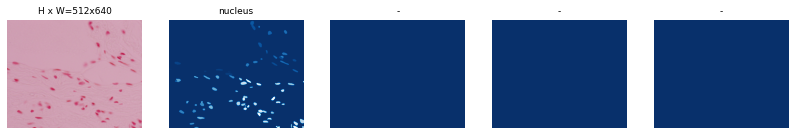

142 11 ['BG', 'nucleus']


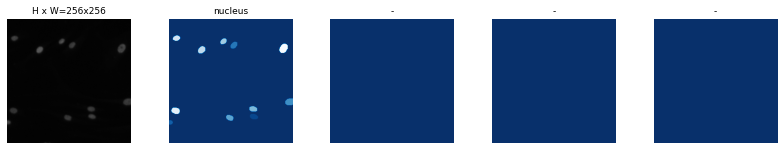

380 14 ['BG', 'nucleus']


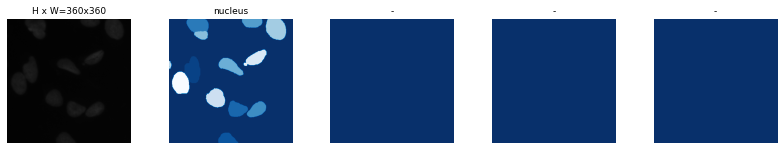

541 29 ['BG', 'nucleus']


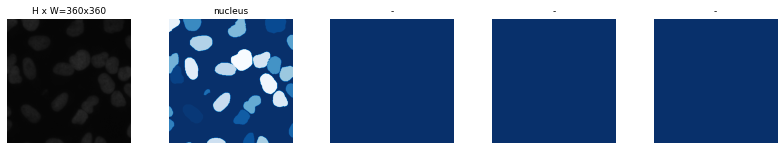

In [ ]:
# Load and display random samples
image_ids = np.random.choice(dataset_train.image_ids, 4)
for image_id in image_ids:
    image = dataset_train.load_image(image_id)
    mask, class_ids = dataset_train.load_mask(image_id)
    print(image_id, len(class_ids),dataset_train.class_names)
    visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)

In [ ]:
# Image augmentation
# http://imgaug.readthedocs.io/en/latest/source/augmenters.html

augmentation = iaa.SomeOf((0, 6), [
    iaa.Fliplr(0.5),
    iaa.Flipud(0.5),
    iaa.OneOf([iaa.Affine(rotate=90),
                iaa.Affine(rotate=180),
                iaa.Affine(rotate=270)]),
    iaa.Multiply((0.8, 1.5)),
    iaa.Invert(0.3, per_channel=False),
    iaa.GaussianBlur(sigma=(0.0, 5.0))
])

/usr/local/lib/python3.7/dist-packages/imgaug/augmenters/base.py:59: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (512, 512, 368) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  category=SuspiciousSingleImageShapeWarning)
/usr/local/lib/python3.7/dist-packages/imgaug/augmenters/base.py:59: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (512, 512, 368) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use

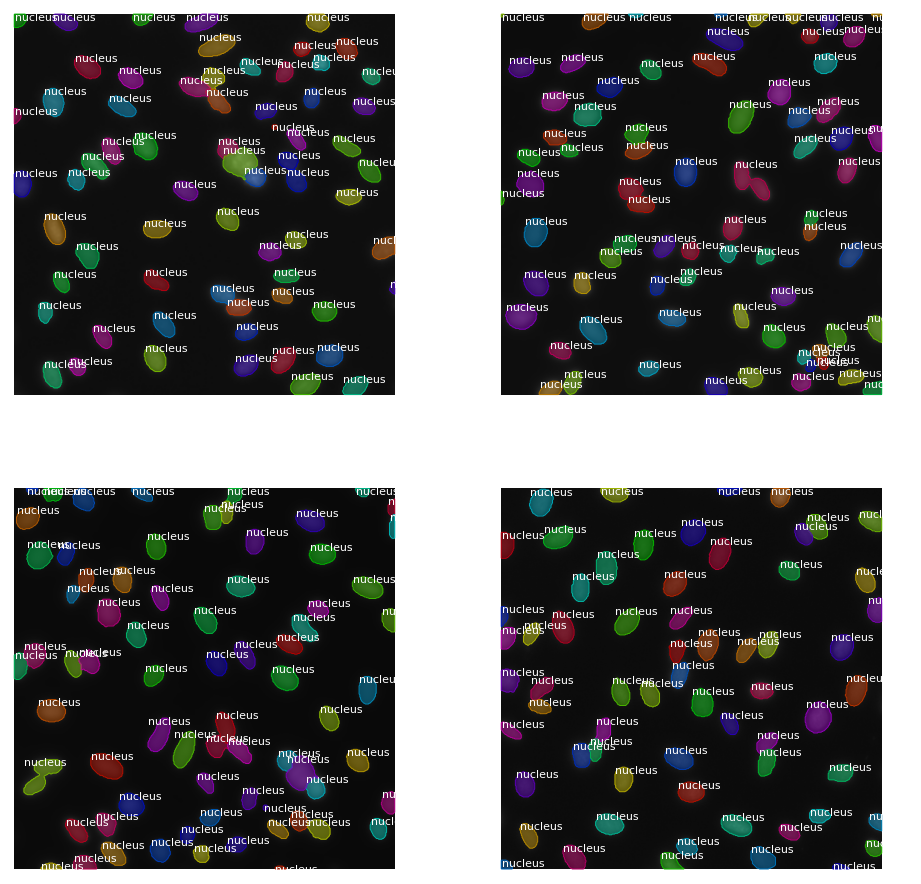

In [ ]:
# Load the image multiple times to show augmentations
limit = 4
image_id = np.random.choice(dataset_train.image_ids, 1)[0]
ax = get_ax(rows=2, cols=limit//2)
for i in range(limit):
    image, image_meta, class_ids, bbox, mask = modellib.load_image_gt(
        dataset_train, config, image_id, use_mini_mask=False, augment=False, augmentation=augmentation)
    visualize.display_instances(image, bbox, mask, class_ids,
                                dataset_train.class_names, ax=ax[i//2, i % 2],
                                show_mask=True, show_bbox=False)

In [ ]:
# Create model in training mode
model = modellib.MaskRCNN(mode="training", config=config,
                          model_dir=MODEL_DIR)

In [ ]:
# Which weights to start with?
init_with = "coco"  # imagenet, coco, or last

if init_with == "imagenet":
    model.load_weights(model.get_imagenet_weights(), by_name=True)
elif init_with == "coco":
    # Load weights trained on MS COCO, but skip layers that
    # are different due to the different number of classes
    model.load_weights(COCO_MODEL_PATH, by_name=True,
                       exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", 
                                "mrcnn_bbox", "mrcnn_mask"])
elif init_with == "last":
    # Load the last model you trained and continue training
    model.load_weights(model.find_last()[1], by_name=True)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#14/08
model.train(dataset_train, dataset_val,
       learning_rate=config.LEARNING_RATE*2,
        epochs=5,
        augmentation=augmentation,
        layers=r"(PREPROC.*)|(conv1.*)|(mrcnn\_.*)")


Starting at epoch 0. LR=0.002

Checkpoint Path: /content/drive/MyDrive/TF2 Project/logs/log/nucleus20220813T1605/mask_rcnn_nucleus_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
In model:  rpn_model
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         (TimeDistributed)
mrcnn_bbox_fc          (TimeDistributed)
mrcnn_mask_deconv      (TimeDistributed)
mrcnn_class_logits     (TimeDistributed)
mrcnn_mask             (TimeDistributed)


Epoch 1/5
410/410 [==============================] - 1071s 3s/step - loss: 4.2232 - val_loss: 2.8888
Epoch 2/5
410/410 [==============================] - 1258s 3s/step - loss: 3.5076 - val_loss: 3.2643
Epoch 3/5
410/410 [==============================] - 891s 2s/step - loss: 3.0357 - val_loss: 2.7144
Epoch 4/5
410/410 [==============================] - 995s 2s/step - loss: 3.0220 - val_loss: 2.3720
Epoch 5/5
410/410 [==============================] - 600s 1s/step - loss: 2.8749 - val_loss: 2.8111


In [ ]:
model.train(dataset_train, dataset_val,
       learning_rate=config.LEARNING_RATE,
        epochs=5+35,
        augmentation=augmentation,
        layers="all")


Starting at epoch 5. LR=0.001

Checkpoint Path: /content/drive/MyDrive/TF2 Project/logs/log/nucleus20220813T1605/mask_rcnn_nucleus_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2a          (BatchNorm)
res3a_branch2b         

Epoch 6/40
410/410 [==============================] - 742s 2s/step - loss: 1.5715 - val_loss: 0.7750
Epoch 7/40
410/410 [==============================] - 812s 2s/step - loss: 1.2460 - val_loss: 1.1719
Epoch 8/40
410/410 [==============================] - 531s 1s/step - loss: 1.0773 - val_loss: 1.0183
Epoch 9/40
410/410 [==============================] - 609s 1s/step - loss: 1.0139 - val_loss: 0.9975
Epoch 10/40
410/410 [==============================] - 679s 2s/step - loss: 1.0457 - val_loss: 0.8619
Epoch 11/40
410/410 [==============================] - 676s 2s/step - loss: 0.9969 - val_loss: 0.2608
Epoch 12/40
410/410 [==============================] - 661s 2s/step - loss: 0.9623 - val_loss: 0.4522
Epoch 13/40
410/410 [==============================] - 595s 1s/step - loss: 0.9151 - val_loss: 1.0495
Epoch 14/40
410/410 [==============================] - 672s 2s/step - loss: 0.9379 - val_loss: 0.8533
Epoch 15/40
410/410 [==============================] - 695s 2s/step - loss: 0.9146 - v

In [ ]:
model.train(dataset_train, dataset_val,
       learning_rate=config.LEARNING_RATE * 0.5,
        epochs=40+5,
        augmentation=augmentation,
        layers='5+')


Starting at epoch 40. LR=0.0005

Checkpoint Path: /content/drive/MyDrive/TF2 Project/logs/log/nucleus20220813T1605/mask_rcnn_nucleus_{epoch:04d}.h5
Selecting layers to train
res5a_branch2a         (Conv2D)
bn5a_branch2a          (BatchNorm)
res5a_branch2b         (Conv2D)
bn5a_branch2b          (BatchNorm)
res5a_branch2c         (Conv2D)
res5a_branch1          (Conv2D)
bn5a_branch2c          (BatchNorm)
bn5a_branch1           (BatchNorm)
res5b_branch2a         (Conv2D)
bn5b_branch2a          (BatchNorm)
res5b_branch2b         (Conv2D)
bn5b_branch2b          (BatchNorm)
res5b_branch2c         (Conv2D)
bn5b_branch2c          (BatchNorm)
res5c_branch2a         (Conv2D)
bn5c_branch2a          (BatchNorm)
res5c_branch2b         (Conv2D)
bn5c_branch2b          (BatchNorm)
res5c_branch2c         (Conv2D)
bn5c_branch2c          (BatchNorm)
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Con

Epoch 41/45
410/410 [==============================] - 747s 2s/step - loss: 0.8160 - val_loss: 0.5163
Epoch 42/45
410/410 [==============================] - 756s 2s/step - loss: 0.8294 - val_loss: 0.5072
Epoch 43/45
410/410 [==============================] - 493s 1s/step - loss: 0.7326 - val_loss: 0.9980
Epoch 44/45
410/410 [==============================] - 566s 1s/step - loss: 0.7613 - val_loss: 1.1034
Epoch 45/45
410/410 [==============================] - 627s 2s/step - loss: 0.7760 - val_loss: 0.8700


In [ ]:
#14/08
model.train(dataset_train, dataset_val,
       learning_rate=config.LEARNING_RATE * 0.1,
        epochs=45+5,
        augmentation=augmentation,
        layers='heads')


Starting at epoch 45. LR=0.0001

Checkpoint Path: /content/drive/MyDrive/TF2 Project/logs/log/nucleus20220813T1605/mask_rcnn_nucleus_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDi

Epoch 46/50
410/410 [==============================] - 677s 2s/step - loss: 0.7823 - val_loss: 0.2936
Epoch 47/50
410/410 [==============================] - 762s 2s/step - loss: 0.8207 - val_loss: 0.4847
Epoch 48/50
410/410 [==============================] - 493s 1s/step - loss: 0.7101 - val_loss: 0.7000
Epoch 49/50
410/410 [==============================] - 584s 1s/step - loss: 0.7467 - val_loss: 0.6940
Epoch 50/50
410/410 [==============================] - 661s 2s/step - loss: 0.7977 - val_loss: 1.4598


In [ ]:
#14/08 retry
model.train(dataset_train, dataset_val,
       learning_rate=config.LEARNING_RATE * 0.1,
        epochs=45+5,
        augmentation=augmentation,
        layers='heads')


Starting at epoch 45. LR=0.0001

Checkpoint Path: /content/drive/MyDrive/TF2 Project/logs/log/nucleus20220813T1605/mask_rcnn_nucleus_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDi

Epoch 46/50
410/410 [==============================] - 1180s 3s/step - loss: 0.7702 - val_loss: 0.5706
Epoch 47/50
410/410 [==============================] - 890s 2s/step - loss: 0.7788 - val_loss: 0.7687
Epoch 48/50
410/410 [==============================] - 860s 2s/step - loss: 0.7324 - val_loss: 0.2681
Epoch 49/50
410/410 [==============================] - 918s 2s/step - loss: 0.8085 - val_loss: 1.1189
Epoch 50/50
410/410 [==============================] - 638s 2s/step - loss: 0.7652 - val_loss: 0.8321


In [ ]:
# Save weights
# Typically not needed because callbacks save after every epoch
# Uncomment to save manually
model_path = os.path.join(MODEL_DIR, "mask_rcnn_shapes_final.h5")
model.keras_model.save_weights(model_path)

In [ ]:
class NucleusInferenceConfig(NucleusConfig):
    # Set batch size to 1 to run one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    # Don't resize imager for inferencing
    IMAGE_RESIZE_MODE = "pad64"
    # Non-max suppression threshold to filter RPN proposals.
    # You can increase this during training to generate more propsals.
    RPN_NMS_THRESHOLD = 0.75


inference_config = NucleusInferenceConfig()
inference_config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        400
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  512
IMAGE_MIN_SCALE                1
IMAGE_RESIZE_MODE              pad64
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE              

In [ ]:
def cluster_prediction(model, config, image):

    """ Test time augmentation method using bounding box IoU"""
    # from utils import non_max_suppression, extract_bboxes, compute_overlaps
    height, width = image.shape[:2]

    # Predict masks on actual image
    result1 = model.detect([image], verbose=0)[0]
    # Handles no mask predictions
    if result1['masks'].shape[0] == 0:
        result1['masks'] = np.zeros([height, width, 1])
        result1['masks'][0, 0, 0] = 1
        result1['scores'] = np.ones(1)

    # Predict masks on LR flipped image
    temp_img = np.fliplr(image)
    result2 = model.detect([temp_img], verbose=0)[0]
    result2['masks'] = np.fliplr(result2['masks'])

    # Handles no mask predictions
    if result2['masks'].shape[0] == 0:
        result2['masks'] = np.zeros([height, width, 1])
        result2['masks'][0, 0, 0] = 1
        result2['scores'] = np.ones(1)

    # Compute IoU on masks
    overlaps = utils.compute_overlaps_masks(result1['masks'], result2['masks'])

    for mm in range(overlaps.shape[0]):

        try:
          if np.max(overlaps[mm]) > 0.1:
            ind = np.argmax(overlaps[mm])
            mask = result1['masks'][:, :, mm] + result2['masks'][:, :, ind]
            result1['masks'][:, :, mm] = (mask > 0).astype(np.uint8)
            # result1['scores'][mm] = 0.5*(result1['scores'][mm]+result2['scores'][ind])
          else:
            result1['masks'][:, :, mm] = 0
        except ValueError: 
            result1['masks'][:, :, mm] = 0

        

    return result1

In [ ]:
from skimage.measure import find_contours
from skimage.measure import label
from scipy.ndimage.morphology import binary_fill_holes
from skimage.morphology import dilation, erosion

def postprocess_masks(result, image, min_nuc_size=10):

    """Clean overlaps between bounding boxes, fill small holes, smooth boundaries"""

    height, width = image.shape[:2]

    # If there is no mask prediction do the following
    if result['masks'].shape[0] == 0:
        result['masks'] = np.zeros([height, width, 1])
        result['masks'][0, 0, 0] = 1
        result['scores'] = np.ones(1)
        result['class_ids'] = np.ones(1)

    keep_ind = np.where(np.sum(result['masks'], axis=(0, 1)) > min_nuc_size)[0]
    if len(keep_ind) < result['masks'].shape[-1]:
        # print('Deleting',len(result['masks'])-len(keep_ind), ' empty result['masks']')
        result['masks'] = result['masks'][..., keep_ind]
        result['scores'] = result['scores'][keep_ind]
        result['rois'] = result['rois'][keep_ind]
        result['class_ids'] = result['class_ids'][keep_ind]

    sort_ind = np.argsort(result['scores'])[::-1]
    result['masks'] = result['masks'][..., sort_ind]
    overlap = np.zeros([height, width])

    # Removes overlaps from masks with lower score
    for mm in range(result['masks'].shape[-1]):
        # Fill holes inside the mask
        mask = binary_fill_holes(result['masks'][..., mm]).astype(np.uint8)
        # Smoothen edges using dilation and erosion
        #mask = erosion(dilation(mask, np.ones([5,5])))
        #mask = dilation(erosion(mask, np.ones([5,5])))
        mask = erosion(dilation(mask))
        # Delete overlaps
        overlap += mask
        mask[overlap > 1] = 0
        out_label = label(mask)
        # Remove all the pieces if there are more than one pieces
        if out_label.max() > 1:
            mask[()] = 0

        result['masks'][..., mm] = mask

    keep_ind = np.where(np.sum(result['masks'], axis=(0, 1)) > min_nuc_size)[0]
    if len(keep_ind) < result['masks'].shape[-1]:
        result['masks'] = result['masks'][..., keep_ind]
        result['scores'] = result['scores'][keep_ind]
        result['rois'] = result['rois'][keep_ind]
        result['class_ids'] = result['class_ids'][keep_ind]

    return result

In [ ]:
# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)

# Get path to saved weights
# Either set a specific path or find last trained weights

#best model weights
model_path = os.path.join(MODEL_DIR, "log/nucleus20220813T1605/mask_rcnn_nucleus_0050.h5")

#baseline weights
#model_path = os.path.join(MODEL_DIR, "../../logs/nucleus20220601T1708/mask_rcnn_nucleus_0080.h5")

#model_path = model.find_last()[1]

# Load trained weights (fill in path to trained weights here)
assert model_path != "", "Provide path to trained weights"
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

Loading weights from  /content/drive/MyDrive/TF2 Project/logs/log/nucleus20220813T1605/mask_rcnn_nucleus_0050.h5
Re-starting from epoch 50


original_image           shape: (512, 512, 3)         min:    1.00000  max:  171.00000  uint8
image_meta               shape: (14,)                 min:    0.00000  max:  512.00000  float64
gt_class_id              shape: (12,)                 min:    1.00000  max:    1.00000  int8
gt_bbox                  shape: (12, 4)               min:   12.00000  max:  510.00000  int32
gt_mask                  shape: (512, 512, 12)        min:    0.00000  max:    1.00000  uint8


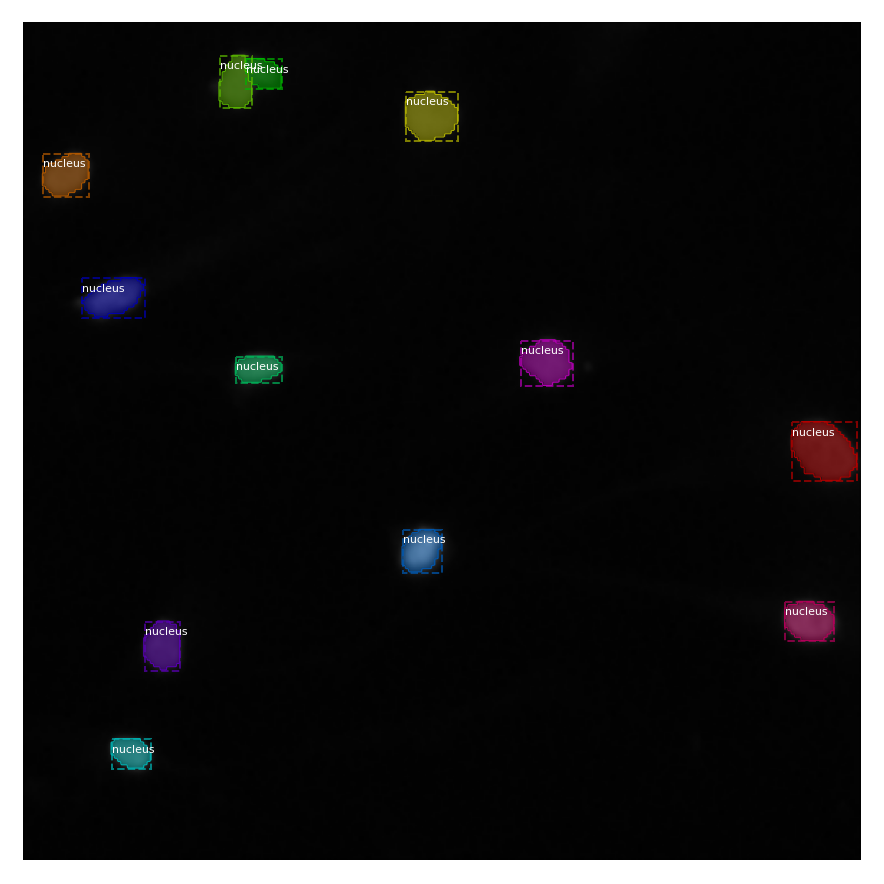

In [ ]:
# Test on a random image
image_id = 1 #random.choice(dataset_val.image_ids)
#image_id = random.choice(dataset_val.image_ids)
original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset_val, inference_config, 
                           image_id, use_mini_mask=False)

log("original_image", original_image)
log("image_meta", image_meta)
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, 
                            dataset_train.class_names)

1
Processing 1 images
image                    shape: (512, 512, 3)         min:    1.00000  max:  171.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min:  -47.22000  max:  131.44000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.17712  max:    1.05188  float32


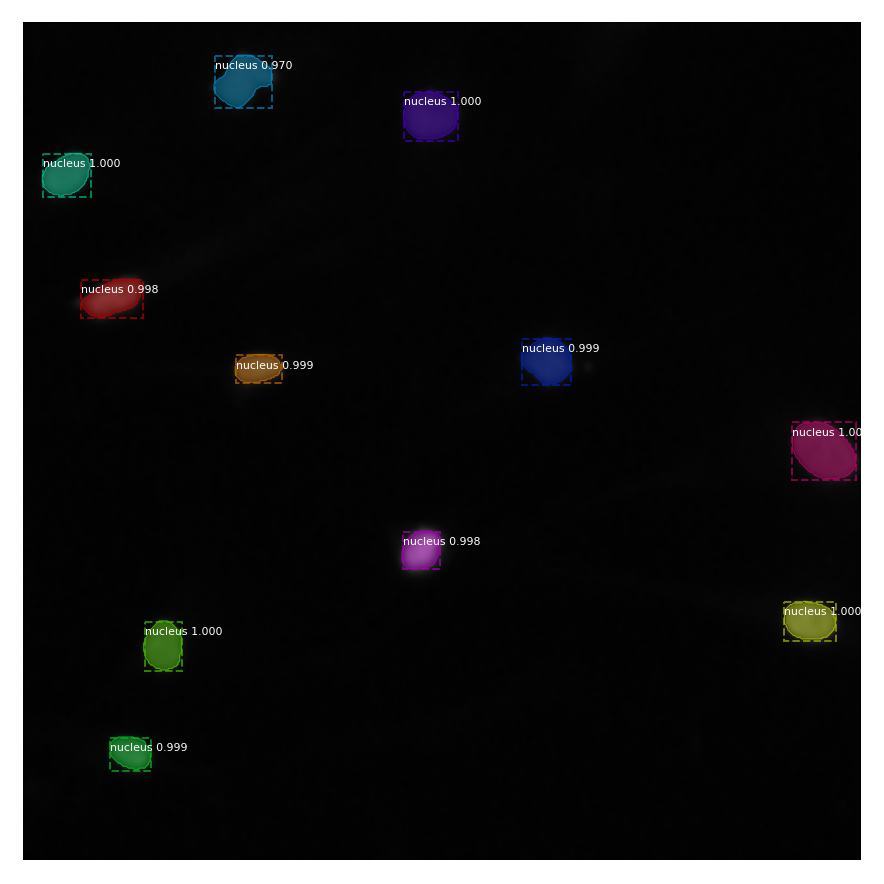

In [ ]:
#LAST
print(len([original_image]))
results = model.detect([original_image], verbose=1)

r = results[0]
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            dataset_val.class_names, r['scores'])

1


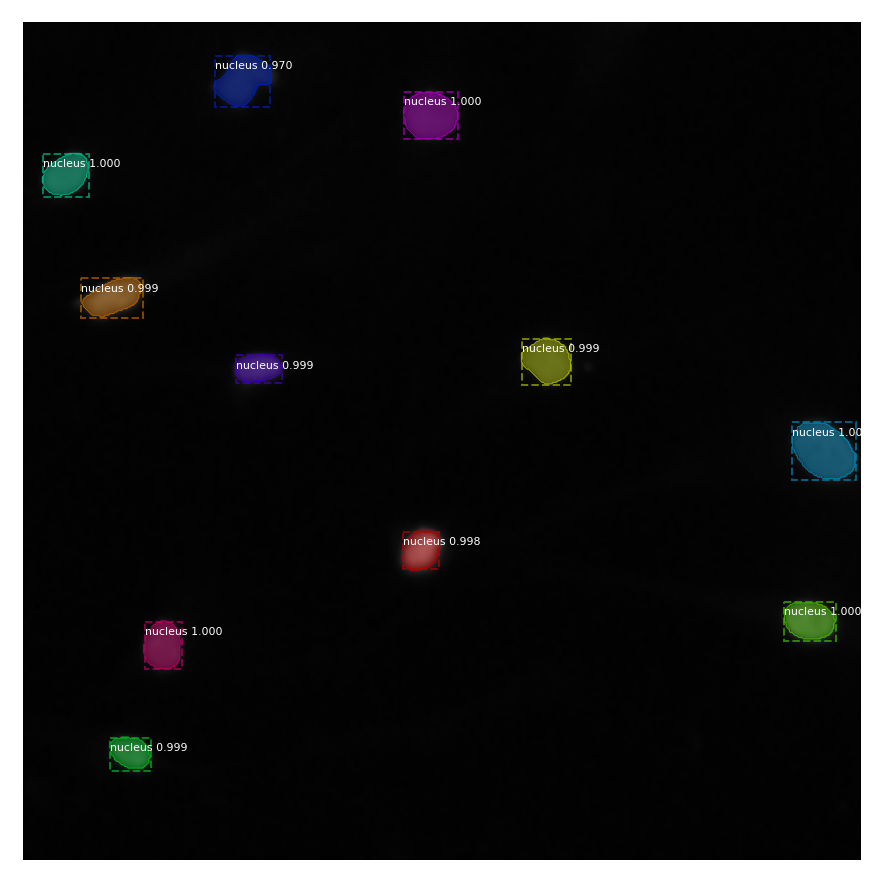

In [ ]:
#LAST
print(len([original_image]))

result = cluster_prediction(model, inference_config, original_image)

        # Clean overlaps and apply some post-processing
result = postprocess_masks(result, original_image)
        # If there is no masks then try to predict on scaled image
if result['masks'].sum() < 2:
  H, W = original_image.shape[:2]
  scaled_img = np.zeros([4*H, 4*W, 3], np.uint8)
  scaled_img[:H, :W] = original_image
  result = cluster_prediction(model, inference_config, scaled_img)
  result['masks'] = result['masks'][:H, :W]
  result = postprocess_masks(result, original_image)


pred_box, pred_class_id, pred_score, pred_mask = result['rois'], result['class_ids'], \
            result['scores'], result['masks']

visualize.display_instances(original_image, pred_box, pred_mask, pred_class_id, 
                            dataset_val.class_names, pred_score)      


In [ ]:
# Test dataset.
dataset_test = KaggleDataset()
val_list = os.listdir(TEST_PATH)
dataset_test.load_shapes(val_list, TEST_PATH)
dataset_test.prepare()

In [ ]:
from tqdm import tqdm

In [ ]:
def plot_preds(model, config, dataset, folder):

    scores = []
    image_ids = dataset.image_ids

    for mm, image_id in tqdm(enumerate(image_ids)):
        # Load image and ground truth data

        image = dataset.load_image(image_id)
        gt_mask, gt_class_id = dataset.load_mask(image_id)
        gt_box = utils.extract_bboxes(gt_mask)

        img_name = dataset.image_info[image_id]['img_name']

        visualize.display_instances(image, gt_box, gt_mask, gt_class_id, 
                            dataset.class_names, show_bbox=False, save_fig_path=folder + str(mm) + '_gt')
        
        result = model.detect([image], verbose=0)[0]

        pred_box, pred_class_id, pred_score, pred_mask = result['rois'], result['class_ids'], \
            result['scores'], result['masks']

        visualize.display_instances(image, pred_box, pred_mask, pred_class_id, 
                            dataset_test.class_names, pred_score, show_bbox=False, save_fig_path=folder + str(mm) + '_pred')   
        
        result = cluster_prediction(model, config, image)

        # Clean overlaps and apply some post-processing
        result = postprocess_masks(result, image)
        # If there is no masks then try to predict on scaled image
        if result['masks'].sum() < 2:
            H, W = image.shape[:2]
            scaled_img = np.zeros([4*H, 4*W, 3], np.uint8)
            scaled_img[:H, :W] = image
            result = cluster_prediction(model, config, scaled_img)
            result['masks'] = result['masks'][:H, :W]
            result = postprocess_masks(result, image)

        pred_box, pred_class_id, pred_score, pred_mask = result['rois'], result['class_ids'], \
            result['scores'], result['masks']

        visualize.display_instances(image, pred_box, pred_mask, pred_class_id, 
                            dataset_test.class_names, pred_score, show_bbox=False, save_fig_path=folder + str(mm) + '_pred_post')      


In [ ]:
plot_preds(model, inference_config, dataset_test, './Preds test 1/')

In [ ]:
plot_preds(model, inference_config, dataset_test, './Preds test 2/')

In [ ]:
#compute average mAP on all IoU threshold (0.5-0.95) using post-processing
def eval_post(model, config, dataset_val):

    scores = []
    image_ids = dataset_val.image_ids

    for mm, image_id in tqdm(enumerate(image_ids)):
        # Load image and ground truth data
        #image, image_meta, gt_class_id, gt_box, gt_mask =\
        #    modellib.load_image_gt(dataset_test, inference_config,
        #                          image_id, use_mini_mask=False)
        
        image = dataset_val.load_image(image_id)
        gt_mask, gt_class_id = dataset_val.load_mask(image_id)

        #img_name = dataset_val.image_info[image_id]['img_name']

        result = cluster_prediction(model, config, image)

        # Clean overlaps and apply some post-processing
        result = postprocess_masks(result, image)
        # If there is no masks then try to predict on scaled image
        if result['masks'].sum() < 2:
            H, W = image.shape[:2]
            scaled_img = np.zeros([4*H, 4*W, 3], np.uint8)
            scaled_img[:H, :W] = image
            result = cluster_prediction(model, config, scaled_img)
            result['masks'] = result['masks'][:H, :W]
            result = postprocess_masks(result, image)

        pred_box, pred_class_id, pred_score, pred_mask = result['rois'], result['class_ids'], \
            result['scores'], result['masks']

        gt_box = utils.extract_bboxes(gt_mask)
        # Compute IoU scores for ground truth and predictions
        iou = utils.compute_ap_range(gt_box, gt_class_id, gt_mask,
                                     pred_box, pred_class_id, pred_score, pred_mask,
                                     iou_thresholds=None, verbose=0)

        scores.append(iou)
        if (mm+1) % 10 == 0:
            print('Mean IoU for', mm+1, 'imgs', np.mean(scores))

    print("Mean IoU: ", np.mean(scores))


In [ ]:
#14/08 training schedule improved mask rcnn on stage2 test set
eval_post(model, inference_config, dataset_test)

10it [06:52, 32.10s/it]

Mean IoU for 10 imgs 0.5806002355926763


20it [13:03, 32.96s/it]

Mean IoU for 20 imgs 0.5791159154710762


30it [17:01, 28.42s/it]

Mean IoU for 30 imgs 0.6287196175633482


40it [23:40, 34.72s/it]

Mean IoU for 40 imgs 0.6367875343681006


50it [26:28, 22.48s/it]

Mean IoU for 50 imgs 0.6511089529509246


60it [29:44, 19.24s/it]

Mean IoU for 60 imgs 0.6649402197989267


70it [33:08, 20.73s/it]

Mean IoU for 70 imgs 0.6529655789429607


80it [38:34, 24.93s/it]

Mean IoU for 80 imgs 0.6551301861670478


90it [41:53, 23.98s/it]

Mean IoU for 90 imgs 0.6576832006050018


100it [47:05, 32.77s/it]

Mean IoU for 100 imgs 0.6565391927246006


106it [50:05, 28.36s/it]

Mean IoU:  0.6630672000691723


In [ ]:
#14/08 training schedule improved mask rcnn on test1
eval_post(model, inference_config, dataset_test)

10it [03:56, 26.86s/it]

Mean IoU for 10 imgs 0.6135675065861272


20it [07:49, 23.84s/it]

Mean IoU for 20 imgs 0.5791411860258899


30it [13:14, 43.15s/it]

Mean IoU for 30 imgs 0.5475213600521125


40it [16:32, 19.36s/it]

Mean IoU for 40 imgs 0.5582778289512511


50it [21:52, 35.17s/it]

Mean IoU for 50 imgs 0.5571145965352805


60it [28:52, 53.85s/it]

Mean IoU for 60 imgs 0.5516834434334528


65it [32:13, 29.74s/it]

Mean IoU:  0.5516324247005341


In [ ]:
#compute average mAP on all IoU threshold (0.5-0.95)
def eval(model, config, dataset_val):

    scores = []
    image_ids = dataset_val.image_ids

    for mm, image_id in tqdm(enumerate(image_ids)):
        # Load image and ground truth data
        #image, image_meta, gt_class_id, gt_box, gt_mask =\
        #    modellib.load_image_gt(dataset_test, inference_config,
        #                          image_id, use_mini_mask=False)
        
        image = dataset_val.load_image(image_id)
        gt_mask, gt_class_id = dataset_val.load_mask(image_id)

        #img_name = dataset_val.image_info[image_id]['img_name']

        results = model.detect([image], verbose=0)
        r = results[0]

        pred_box, pred_class_id, pred_score, pred_mask = r['rois'], r['class_ids'], \
            r['scores'], r['masks']

        gt_box = utils.extract_bboxes(gt_mask)
        # Compute IoU scores for ground truth and predictions
        iou = utils.compute_ap_range(gt_box, gt_class_id, gt_mask,
                                     pred_box, pred_class_id, pred_score, pred_mask,
                                     iou_thresholds=None, verbose=0)
        
        scores.append(iou)
        if (mm+1) % 10 == 0:
            print('Mean IoU for', mm+1, 'imgs', np.mean(scores))

    print("Mean IoU: ", np.mean(scores))


In [ ]:
#14/08 
eval(model, inference_config, dataset_test)

10it [02:42, 12.49s/it]

Mean IoU for 10 imgs 0.5701012929247223


20it [05:05, 12.66s/it]

Mean IoU for 20 imgs 0.5582009203396665


30it [06:54, 12.01s/it]

Mean IoU for 30 imgs 0.6090671293165019


40it [09:28, 13.76s/it]

Mean IoU for 40 imgs 0.6160603292123236


50it [10:34,  8.70s/it]

Mean IoU for 50 imgs 0.6317586801197611


60it [11:52,  7.62s/it]

Mean IoU for 60 imgs 0.6440562472416487


70it [13:15,  8.13s/it]

Mean IoU for 70 imgs 0.6328444715042186


80it [15:18,  9.72s/it]

Mean IoU for 80 imgs 0.6345559316829916


90it [16:47, 11.58s/it]

Mean IoU for 90 imgs 0.6373074801660084


100it [18:47, 12.47s/it]

Mean IoU for 100 imgs 0.6377873434231701


106it [19:54, 11.27s/it]

Mean IoU:  0.6440373940263324


In [ ]:
#original baseline mask rcnn on stage1, compute mAP on each threshold along with the average mAP
thresholds = np.arange(0.5, 1.0, 0.05)
mAP_thresholds = dict.fromkeys(thresholds)

image_ids = dataset_test.image_ids

for iou_threshold in thresholds:
    APs = []
    for mm, image_id in tqdm(enumerate(image_ids)):
        # Load image and ground truth data

        image, image_meta, gt_class_id, gt_box, gt_mask =\
            modellib.load_image_gt(dataset_test, inference_config,
                                  image_id, use_mini_mask=False)

        
        # Run object detection
        results = model.detect([image], verbose=0)
        r = results[0]


        # Compute AP
        AP, precisions, recalls, overlaps =\
            utils.compute_ap(gt_box, gt_class_id, gt_mask,
                            r["rois"], r["class_ids"], r["scores"], r['masks'], iou_threshold=iou_threshold)
        APs.append(AP)
    
    mAP = np.array(APs).mean()
    #mAP = np.mean(APs)
    mAP_thresholds[iou_threshold] = mAP
    print("mAP@", mAP_thresholds[iou_threshold])

print(mAP_thresholds)

65it [12:58, 11.98s/it]


mAP@ 0.7644963870197591


65it [06:23,  5.90s/it]


mAP@ 0.7305298149700445


65it [06:21,  5.87s/it]


mAP@ 0.6867004070915218


65it [06:20,  5.86s/it]


mAP@ 0.6210045304476519


65it [06:19,  5.84s/it]


mAP@ 0.5451221375044459


65it [06:23,  5.89s/it]


mAP@ 0.4694454327337911


65it [06:24,  5.91s/it]


mAP@ 0.35616855565219796


65it [06:20,  5.86s/it]


mAP@ 0.21088639581436924


65it [06:20,  5.85s/it]


mAP@ 0.05589367353431233


65it [06:21,  5.87s/it]

mAP@ 0.000311355326229181
{0.5: 0.7644963870197591, 0.55: 0.7305298149700445, 0.6000000000000001: 0.6867004070915218, 0.6500000000000001: 0.6210045304476519, 0.7000000000000002: 0.5451221375044459, 0.7500000000000002: 0.4694454327337911, 0.8000000000000003: 0.35616855565219796, 0.8500000000000003: 0.21088639581436924, 0.9000000000000004: 0.05589367353431233, 0.9500000000000004: 0.000311355326229181}


In [ ]:
for key, value in mAP_thresholds.items() :
    print (key, value)

res = sum(mAP_thresholds.values()) / len(mAP_thresholds)  
print(res)  

0.5 0.7644963870197591
0.55 0.7305298149700445
0.6000000000000001 0.6867004070915218
0.6500000000000001 0.6210045304476519
0.7000000000000002 0.5451221375044459
0.7500000000000002 0.4694454327337911
0.8000000000000003 0.35616855565219796
0.8500000000000003 0.21088639581436924
0.9000000000000004 0.05589367353431233
0.9500000000000004 0.000311355326229181
0.4440558690094322


In [ ]:
#original baseline mask rcnn on stage2, compute mAP on each threshold along with the average mAP
thresholds = np.arange(0.5, 1.0, 0.05)
mAP_thresholds = dict.fromkeys(thresholds)

image_ids = dataset_test.image_ids

for iou_threshold in thresholds:
    APs = []
    for mm, image_id in tqdm(enumerate(image_ids)):
        # Load image and ground truth data

        image, image_meta, gt_class_id, gt_box, gt_mask =\
            modellib.load_image_gt(dataset_test, inference_config,
                                  image_id, use_mini_mask=False)

        
        # Run object detection
        results = model.detect([image], verbose=0)
        r = results[0]


        # Compute AP
        AP, precisions, recalls, overlaps =\
            utils.compute_ap(gt_box, gt_class_id, gt_mask,
                            r["rois"], r["class_ids"], r["scores"], r['masks'], iou_threshold=iou_threshold)
        APs.append(AP)
    
    mAP = np.array(APs).mean()
    #mAP = np.mean(APs)
    mAP_thresholds[iou_threshold] = mAP
    print("mAP@", mAP_thresholds[iou_threshold])

print(mAP_thresholds)

106it [17:30,  9.91s/it]


mAP@ 0.7218492592607387


106it [08:40,  4.91s/it]


mAP@ 0.6971779427646396


106it [08:39,  4.90s/it]


mAP@ 0.6635070963472858


106it [08:34,  4.85s/it]


mAP@ 0.6239575574676165


106it [08:28,  4.80s/it]


mAP@ 0.5672135517263767


106it [08:25,  4.77s/it]


mAP@ 0.5133004603223726


106it [08:31,  4.83s/it]


mAP@ 0.43220118739957636


106it [08:23,  4.75s/it]


mAP@ 0.30500986238942807


106it [08:26,  4.78s/it]


mAP@ 0.0738909699795452


106it [08:26,  4.78s/it]

mAP@ 0.00035262960806780957
{0.5: 0.7218492592607387, 0.55: 0.6971779427646396, 0.6000000000000001: 0.6635070963472858, 0.6500000000000001: 0.6239575574676165, 0.7000000000000002: 0.5672135517263767, 0.7500000000000002: 0.5133004603223726, 0.8000000000000003: 0.43220118739957636, 0.8500000000000003: 0.30500986238942807, 0.9000000000000004: 0.0738909699795452, 0.9500000000000004: 0.00035262960806780957}


In [ ]:
for key, value in mAP_thresholds.items() :
    print (key, value)

res = sum(mAP_thresholds.values()) / len(mAP_thresholds)  
print(res)  

0.5 0.7218492592607387
0.55 0.6971779427646396
0.6000000000000001 0.6635070963472858
0.6500000000000001 0.6239575574676165
0.7000000000000002 0.5672135517263767
0.7500000000000002 0.5133004603223726
0.8000000000000003 0.43220118739957636
0.8500000000000003 0.30500986238942807
0.9000000000000004 0.0738909699795452
0.9500000000000004 0.00035262960806780957
0.45984605172656473


In [ ]:
#original baseline mask rcnn w/post processing on stage2, compute mAP on each threshold along with the average mAP
thresholds = np.arange(0.5, 1.0, 0.05)
mAP_thresholds = dict.fromkeys(thresholds)

image_ids = dataset_test.image_ids

for iou_threshold in thresholds:
    APs = []
    for mm, image_id in tqdm(enumerate(image_ids)):
        # Load image and ground truth data

        image, image_meta, gt_class_id, gt_box, gt_mask =\
            modellib.load_image_gt(dataset_test, inference_config,
                                  image_id, use_mini_mask=False)

       
            
        result = cluster_prediction(model, inference_config, image)

        # Clean overlaps and apply some post-processing
        result = postprocess_masks(result, image)

        # If there is no masks then try to predict on scaled image
        if result['masks'].sum() < 2:
            H, W = image.shape[:2]
            scaled_img = np.zeros([4*H, 4*W, 3], np.uint8)
            scaled_img[:H, :W] = image
            result = cluster_prediction(model, inference_config, scaled_img)
            result['masks'] = result['masks'][:H, :W]
            result = postprocess_masks(result, image)

        pred_box, pred_class_id, pred_score, pred_mask = result['rois'], result['class_ids'], \
            result['scores'], result['masks']    
        
        
        # Compute AP
        AP, precisions, recalls, overlaps = utils.compute_ap(gt_box, gt_class_id, gt_mask,
                                     pred_box, pred_class_id, pred_score, pred_mask, iou_threshold=iou_threshold)
        APs.append(AP)
    
    mAP = np.array(APs).mean()
    #mAP = np.mean(APs)
    mAP_thresholds[iou_threshold] = mAP
    print("mAP@", mAP_thresholds[iou_threshold])

print(mAP_thresholds)

106it [25:19, 14.34s/it]


mAP@ 0.7245551619586957


106it [25:25, 14.39s/it]


mAP@ 0.703408510106585


106it [25:28, 14.42s/it]


mAP@ 0.6762469642059481


106it [25:25, 14.39s/it]


mAP@ 0.6421669921657477


106it [25:03, 14.18s/it]


mAP@ 0.5998044640638176


106it [25:07, 14.22s/it]


mAP@ 0.5354426055147995


106it [24:54, 14.10s/it]


mAP@ 0.4706194133875367


106it [25:13, 14.27s/it]


mAP@ 0.36085767675236446


106it [25:00, 14.15s/it]


mAP@ 0.110291372456455


106it [25:01, 14.17s/it]

mAP@ 0.004131612124193226
{0.5: 0.7245551619586957, 0.55: 0.703408510106585, 0.6000000000000001: 0.6762469642059481, 0.6500000000000001: 0.6421669921657477, 0.7000000000000002: 0.5998044640638176, 0.7500000000000002: 0.5354426055147995, 0.8000000000000003: 0.4706194133875367, 0.8500000000000003: 0.36085767675236446, 0.9000000000000004: 0.110291372456455, 0.9500000000000004: 0.004131612124193226}


In [ ]:
for key, value in mAP_thresholds.items() :
    print (key, value)

res = sum(mAP_thresholds.values()) / len(mAP_thresholds)  
print(res)  

0.5 0.7245551619586957
0.55 0.703408510106585
0.6000000000000001 0.6762469642059481
0.6500000000000001 0.6421669921657477
0.7000000000000002 0.5998044640638176
0.7500000000000002 0.5354426055147995
0.8000000000000003 0.4706194133875367
0.8500000000000003 0.36085767675236446
0.9000000000000004 0.110291372456455
0.9500000000000004 0.004131612124193226
0.4827524772736143


In [ ]:
#14/08 training schedule improved mask rcnn on stage1, compute mAP on each threshold along with the average mAP
thresholds = np.arange(0.5, 1.0, 0.05)
mAP_thresholds = dict.fromkeys(thresholds)

image_ids = dataset_test.image_ids

for iou_threshold in thresholds:
    APs = []
    for mm, image_id in tqdm(enumerate(image_ids)):
        # Load image and ground truth data
        image = dataset_test.load_image(image_id)
        gt_mask, gt_class_id = dataset_test.load_mask(image_id)

        img_name = dataset_test.image_info[image_id]['img_name']   
        
        # Run object detection
        results = model.detect([image], verbose=0)
        r = results[0]

        gt_box = utils.extract_bboxes(gt_mask)

        # Compute AP
        AP, precisions, recalls, overlaps =\
            utils.compute_ap(gt_box, gt_class_id, gt_mask,
                            r["rois"], r["class_ids"], r["scores"], r['masks'], iou_threshold=iou_threshold)
        APs.append(AP)
    
    mAP = np.array(APs).mean()
    #mAP = np.mean(APs)
    mAP_thresholds[iou_threshold] = mAP
    print("mAP@", mAP_thresholds[iou_threshold])

print(mAP_thresholds)

65it [01:20,  1.24s/it]


mAP@ 0.813794381193143


65it [01:18,  1.21s/it]


mAP@ 0.7968222534544219


65it [01:19,  1.23s/it]


mAP@ 0.7753344814999384


65it [01:19,  1.22s/it]


mAP@ 0.745148693031348


65it [01:19,  1.23s/it]


mAP@ 0.6838940136897129


65it [01:19,  1.22s/it]


mAP@ 0.61317762152097


65it [01:19,  1.23s/it]


mAP@ 0.5154674844536395


65it [01:18,  1.21s/it]


mAP@ 0.3459262352548148


65it [01:20,  1.23s/it]


mAP@ 0.12276572099772598


65it [01:19,  1.22s/it]

mAP@ 0.00891484660032233
{0.5: 0.813794381193143, 0.55: 0.7968222534544219, 0.6000000000000001: 0.7753344814999384, 0.6500000000000001: 0.745148693031348, 0.7000000000000002: 0.6838940136897129, 0.7500000000000002: 0.61317762152097, 0.8000000000000003: 0.5154674844536395, 0.8500000000000003: 0.3459262352548148, 0.9000000000000004: 0.12276572099772598, 0.9500000000000004: 0.00891484660032233}


In [ ]:
for key, value in mAP_thresholds.items() :
    print (key, value)

res = sum(mAP_thresholds.values()) / len(mAP_thresholds)  
print(res)  

0.5 0.813794381193143
0.55 0.7968222534544219
0.6000000000000001 0.7753344814999384
0.6500000000000001 0.745148693031348
0.7000000000000002 0.6838940136897129
0.7500000000000002 0.61317762152097
0.8000000000000003 0.5154674844536395
0.8500000000000003 0.3459262352548148
0.9000000000000004 0.12276572099772598
0.9500000000000004 0.00891484660032233
0.5421245731696038


In [ ]:
#14/08 training schedule improved mask rcnn w/post processing on stage1, compute mAP on each threshold along with the average mAP
thresholds = np.arange(0.5, 1.0, 0.05)
mAP_thresholds = dict.fromkeys(thresholds)

image_ids = dataset_test.image_ids

for iou_threshold in thresholds:
    APs = []
    for mm, image_id in tqdm(enumerate(image_ids)):
        # Load image and ground truth data
        
        image = dataset_test.load_image(image_id)
        gt_mask, gt_class_id = dataset_test.load_mask(image_id)

        img_name = dataset_test.image_info[image_id]['img_name']    
            
        result = cluster_prediction(model, inference_config, image)

        # Clean overlaps and apply some post-processing
        result = postprocess_masks(result, image)

        # If there is no masks then try to predict on scaled image
        if result['masks'].sum() < 2:
            H, W = image.shape[:2]
            scaled_img = np.zeros([4*H, 4*W, 3], np.uint8)
            scaled_img[:H, :W] = image
            result = cluster_prediction(model, inference_config, scaled_img)
            result['masks'] = result['masks'][:H, :W]
            result = postprocess_masks(result, image)

        pred_box, pred_class_id, pred_score, pred_mask = result['rois'], result['class_ids'], \
            result['scores'], result['masks']    
        
        gt_box = utils.extract_bboxes(gt_mask)
        
        # Compute AP
        AP, precisions, recalls, overlaps = utils.compute_ap(gt_box, gt_class_id, gt_mask,
                                     pred_box, pred_class_id, pred_score, pred_mask, iou_threshold=iou_threshold)
        APs.append(AP)
    
    mAP = np.array(APs).mean()
    #mAP = np.mean(APs)
    mAP_thresholds[iou_threshold] = mAP
    print("mAP@", mAP_thresholds[iou_threshold])

print(mAP_thresholds)

65it [02:34,  2.38s/it]


mAP@ 0.7980285683351641


65it [02:32,  2.35s/it]


mAP@ 0.7877212401723552


65it [02:32,  2.35s/it]


mAP@ 0.7722396595054887


65it [02:32,  2.34s/it]


mAP@ 0.746743116151459


65it [02:32,  2.35s/it]


mAP@ 0.6966476013371518


65it [02:32,  2.35s/it]


mAP@ 0.6294245794177051


65it [02:32,  2.35s/it]


mAP@ 0.5423700281627116


65it [02:32,  2.35s/it]


mAP@ 0.38140250601691367


65it [02:32,  2.34s/it]


mAP@ 0.14959638388856292


65it [02:32,  2.35s/it]

mAP@ 0.01215056401782883
{0.5: 0.7980285683351641, 0.55: 0.7877212401723552, 0.6000000000000001: 0.7722396595054887, 0.6500000000000001: 0.746743116151459, 0.7000000000000002: 0.6966476013371518, 0.7500000000000002: 0.6294245794177051, 0.8000000000000003: 0.5423700281627116, 0.8500000000000003: 0.38140250601691367, 0.9000000000000004: 0.14959638388856292, 0.9500000000000004: 0.01215056401782883}


In [ ]:

for key, value in mAP_thresholds.items() :
    print (key, value)

res = sum(mAP_thresholds.values()) / len(mAP_thresholds)  
print(res)  

0.5 0.7980285683351641
0.55 0.7877212401723552
0.6000000000000001 0.7722396595054887
0.6500000000000001 0.746743116151459
0.7000000000000002 0.6966476013371518
0.7500000000000002 0.6294245794177051
0.8000000000000003 0.5423700281627116
0.8500000000000003 0.38140250601691367
0.9000000000000004 0.14959638388856292
0.9500000000000004 0.01215056401782883
0.5516324247005341


In [ ]:
#14/08 training schedule improved mask rcnn on stage2, compute mAP on each threshold along with the average mAP
thresholds = np.arange(0.5, 1.0, 0.05)
mAP_thresholds = dict.fromkeys(thresholds)

image_ids = dataset_test.image_ids

for iou_threshold in thresholds:
    APs = []
    for mm, image_id in tqdm(enumerate(image_ids)):
        # Load image and ground truth data

        image = dataset_test.load_image(image_id)
        gt_mask, gt_class_id = dataset_test.load_mask(image_id)

        img_name = dataset_test.image_info[image_id]['img_name']   
        
        # Run object detection
        results = model.detect([image], verbose=0)
        r = results[0]

        gt_box = utils.extract_bboxes(gt_mask)

        # Compute AP
        AP, precisions, recalls, overlaps =\
            utils.compute_ap(gt_box, gt_class_id, gt_mask,
                            r["rois"], r["class_ids"], r["scores"], r['masks'], iou_threshold=iou_threshold)
        APs.append(AP)
    
    mAP = np.array(APs).mean()
    #mAP = np.mean(APs)
    mAP_thresholds[iou_threshold] = mAP
    print("mAP@", mAP_thresholds[iou_threshold])

print(mAP_thresholds)

106it [16:38,  9.42s/it]


mAP@ 0.8470554764387775


106it [01:27,  1.21it/s]


mAP@ 0.8406139593635962


106it [01:27,  1.22it/s]


mAP@ 0.8269480652054925


106it [01:27,  1.21it/s]


mAP@ 0.8147559646782928


106it [01:26,  1.22it/s]


mAP@ 0.7916108806149202


106it [01:28,  1.20it/s]


mAP@ 0.7392527392025762


106it [01:27,  1.21it/s]


mAP@ 0.6622934453170642


106it [01:28,  1.20it/s]


mAP@ 0.5088951021559126


106it [01:27,  1.21it/s]


mAP@ 0.3472896907856001


106it [01:27,  1.21it/s]

mAP@ 0.061658616501091335
{0.5: 0.8470554764387775, 0.55: 0.8406139593635962, 0.6000000000000001: 0.8269480652054925, 0.6500000000000001: 0.8147559646782928, 0.7000000000000002: 0.7916108806149202, 0.7500000000000002: 0.7392527392025762, 0.8000000000000003: 0.6622934453170642, 0.8500000000000003: 0.5088951021559126, 0.9000000000000004: 0.3472896907856001, 0.9500000000000004: 0.061658616501091335}


In [ ]:

for key, value in mAP_thresholds.items() :
    print (key, value)

res = sum(mAP_thresholds.values()) / len(mAP_thresholds)  
print(res)  

0.5 0.8470554764387775
0.55 0.8406139593635962
0.6000000000000001 0.8269480652054925
0.6500000000000001 0.8147559646782928
0.7000000000000002 0.7916108806149202
0.7500000000000002 0.7392527392025762
0.8000000000000003 0.6622934453170642
0.8500000000000003 0.5088951021559126
0.9000000000000004 0.3472896907856001
0.9500000000000004 0.061658616501091335
0.6440373940263324


In [ ]:
#14/08 training schedule improved mask rcnn w/post processing on stage2, compute mAP on each threshold along with the average mAP
thresholds = np.arange(0.5, 1.0, 0.05)
mAP_thresholds = dict.fromkeys(thresholds)

image_ids = dataset_test.image_ids

for iou_threshold in thresholds:
    APs = []
    for mm, image_id in tqdm(enumerate(image_ids)):
        # Load image and ground truth data

        image = dataset_test.load_image(image_id)
        gt_mask, gt_class_id = dataset_test.load_mask(image_id)

        img_name = dataset_test.image_info[image_id]['img_name']    
            
        result = cluster_prediction(model, inference_config, image)

        # Clean overlaps and apply some post-processing
        result = postprocess_masks(result, image)

        # If there is no masks then try to predict on scaled image
        if result['masks'].sum() < 2:
            H, W = image.shape[:2]
            scaled_img = np.zeros([4*H, 4*W, 3], np.uint8)
            scaled_img[:H, :W] = image
            result = cluster_prediction(model, inference_config, scaled_img)
            result['masks'] = result['masks'][:H, :W]
            result = postprocess_masks(result, image)

        pred_box, pred_class_id, pred_score, pred_mask = result['rois'], result['class_ids'], \
            result['scores'], result['masks']    
        
        gt_box = utils.extract_bboxes(gt_mask)
        
        # Compute AP
        AP, precisions, recalls, overlaps = utils.compute_ap(gt_box, gt_class_id, gt_mask,
                                     pred_box, pred_class_id, pred_score, pred_mask, iou_threshold=iou_threshold)
        APs.append(AP)
    
    mAP = np.array(APs).mean()
    #mAP = np.mean(APs)
    mAP_thresholds[iou_threshold] = mAP
    print("mAP@", mAP_thresholds[iou_threshold])

print(mAP_thresholds)

106it [02:57,  1.67s/it]


mAP@ 0.8408444168349529


106it [02:56,  1.67s/it]


mAP@ 0.8316748364233222


106it [02:56,  1.66s/it]


mAP@ 0.8208169828153656


106it [02:56,  1.66s/it]


mAP@ 0.8097101347191985


106it [02:56,  1.66s/it]


mAP@ 0.7975967895214728


106it [02:56,  1.67s/it]


mAP@ 0.7645121073871997


106it [02:57,  1.67s/it]


mAP@ 0.7000568942042299


106it [02:56,  1.67s/it]


mAP@ 0.5663313604636588


106it [02:55,  1.65s/it]


mAP@ 0.3723555617295297


106it [02:55,  1.66s/it]

mAP@ 0.12677291659279416
{0.5: 0.8408444168349529, 0.55: 0.8316748364233222, 0.6000000000000001: 0.8208169828153656, 0.6500000000000001: 0.8097101347191985, 0.7000000000000002: 0.7975967895214728, 0.7500000000000002: 0.7645121073871997, 0.8000000000000003: 0.7000568942042299, 0.8500000000000003: 0.5663313604636588, 0.9000000000000004: 0.3723555617295297, 0.9500000000000004: 0.12677291659279416}


In [ ]:

for key, value in mAP_thresholds.items() :
    print (key, value)

res = sum(mAP_thresholds.values()) / len(mAP_thresholds)  
print(res)  

0.5 0.8408444168349529
0.55 0.8316748364233222
0.6000000000000001 0.8208169828153656
0.6500000000000001 0.8097101347191985
0.7000000000000002 0.7975967895214728
0.7500000000000002 0.7645121073871997
0.8000000000000003 0.7000568942042299
0.8500000000000003 0.5663313604636588
0.9000000000000004 0.3723555617295297
0.9500000000000004 0.12677291659279416
0.6630672000691724


In [ ]:
X_test = np.zeros((len(test_ids), inference_config.IMAGE_SHAPE[0], inference_config.IMAGE_SHAPE[1], 3), dtype=np.uint8)
sizes_test = []
_test_ids = []

print('Getting and resizing test images ... ')
#sys.stdout.flush()
for n, id_ in enumerate(test_ids):
    _test_ids.append([id_])
    path = TEST_PATH + id_
    img = imread(path + '/images/' + id_ + '.png')[:,:,:3]
    sizes_test.append([img.shape[0], img.shape[1]])
    img = resize(img, (inference_config.IMAGE_SHAPE[0], inference_config.IMAGE_SHAPE[1]), mode='constant', preserve_range=True)
    X_test[n] = img

Getting and resizing test images ... 


checking a test image with masks ...
Processing 1 images
image                    shape: (512, 512, 3)         min:    9.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min:  -39.22000  max:  215.44000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.08847  max:    1.02591  float32


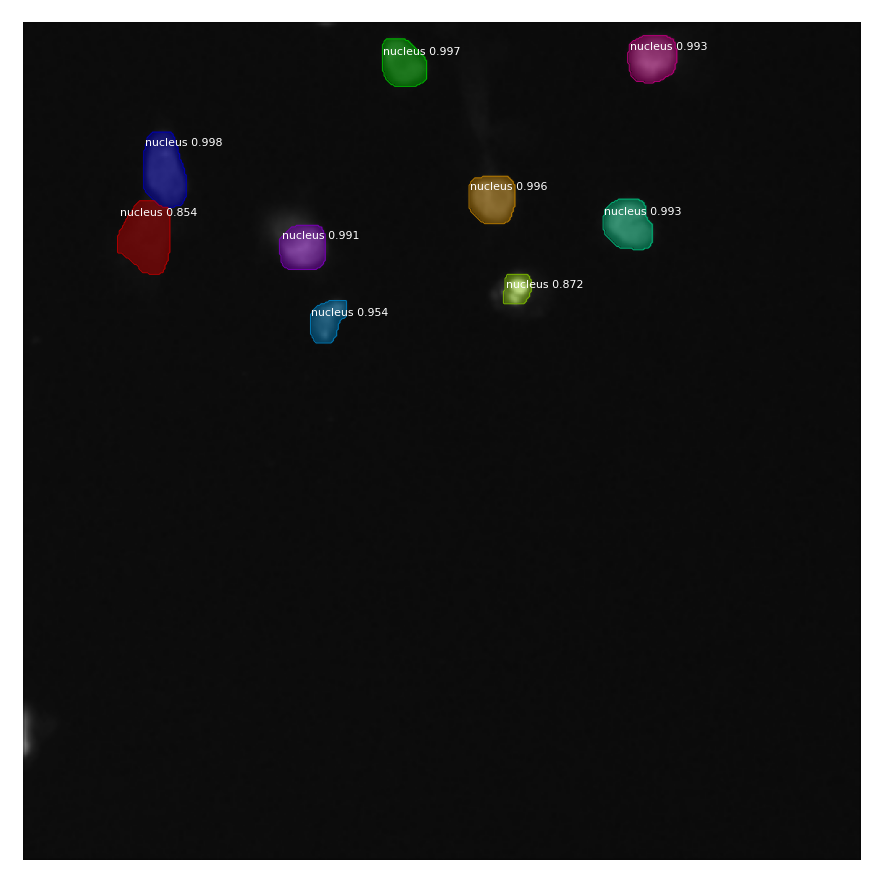

In [ ]:
print("checking a test image with masks ...")
results = model.detect([X_test[0]], verbose=1)

r = postprocess_masks(results[0], X_test[0], 150)

visualize.display_instances(X_test[0], r['rois'], r['masks'], r['class_ids'], 
                            dataset_test.class_names, r['scores'], show_bbox=False)

checking a test image with masks ...
Processing 1 images
image                    shape: (256, 256, 3)         min:    0.00000  max:   78.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min:  -48.22000  max:   35.44000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 65472, 4)         min:   -0.17712  max:    1.05188  float32


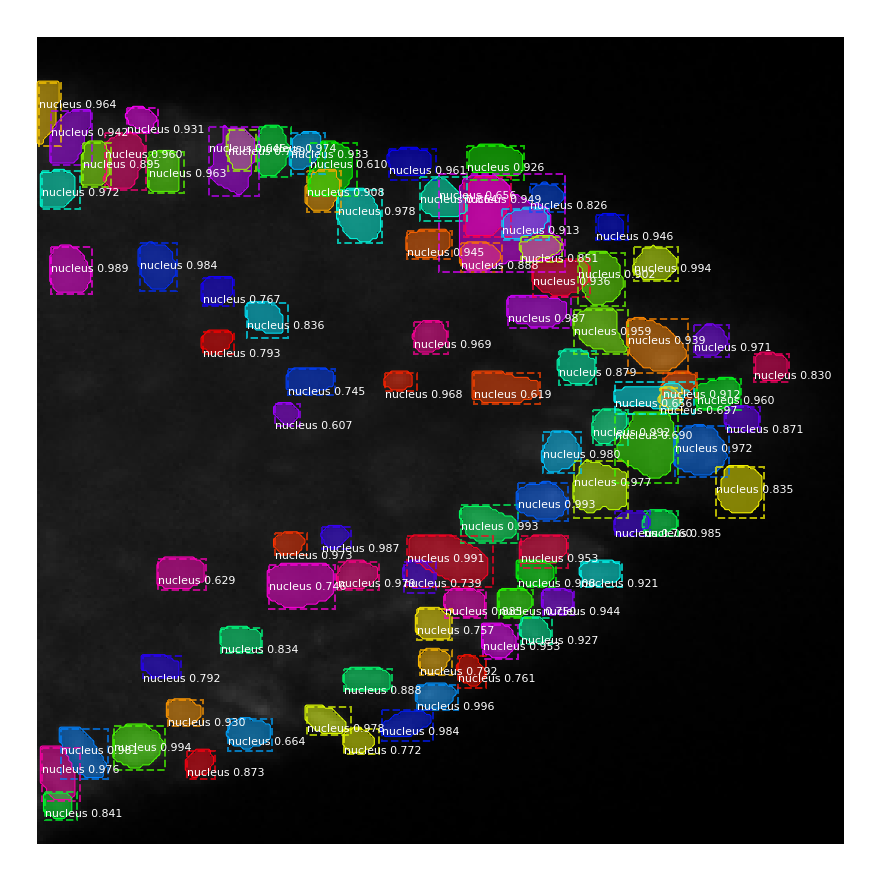

In [ ]:
print("checking a test image with masks ...")
results = model.detect([X_test[20]], verbose=1)

r = results[0]
visualize.display_instances(X_test[20], r['rois'], r['masks'], r['class_ids'], 
                            dataset_val.class_names, r['scores'])